<a href="https://colab.research.google.com/github/Tejaswi-Mahadev/RL_HA/blob/main/Chess_PAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**CHESS GAME USING PAC LEARNING**

The code is a Python implementation of a simplified chess-like game using a 4x4 board. It combines machine learning (PAC: Probably Approximately Correct) and interactive gameplay. The overall flow includes generating random board states, training a machine learning model to predict optimal moves for the AI, and allowing the user to play against the AI. Here's the high-level logic:


**Board Representation**:

The game is played on a 4x4 grid.
A King and Pawns are represented numerically (KING = 1, PAWN = 2, EMPTY = 0).

**Data Preparation**:

Random board states are generated for training.
For each board, the AI computes the optimal move using predefined logic.


**Model Training**:

A supervised learning model (DecisionTreeClassifier) is trained on the board states and their optimal moves.
The trained model predicts AI moves during gameplay.


**Interactive Gameplay**:

The user and AI take turns making moves.
The user's goal is to capture the AI's King by strategically placing Pawns.
The game ends when the King is captured or the user quits.

## **FUNCTION OVERVIEW**

1.**encode_move**

* Purpose: Converts a 2D board coordinate (x, y) into a single integer.

* Use Case: Simplifies storing and processing moves in the dataset.


2.**decode_move**

* Purpose: Converts a single encoded integer back into a 2D coordinate (x, y).

* Use Case: Translates model predictions into board positions.

3.**generate_random_board**

* Purpose: Creates a random 4x4 board with one King and two Pawns placed at random positions.

* Logic:
Initializes an empty board.
Randomly places a King and two Pawns while avoiding overlaps.
Use Case: Generates training data and initializes gameplay boards.

4. **get_optimal_move**

* Purpose: Calculates the best move for the King based on the current board state.

* Logic:
Finds the King's current position.
Evaluates all possible moves (up, down, left, right).
Scores each move based on proximity to the board's center (centrality).
Returns the encoded move with the highest score.
Use Case: Provides "optimal" moves for training and AI gameplay.

5.**generate_dataset**

* Purpose: Creates a dataset of board states (X) and optimal moves (y).

* Logic:
Generates multiple random boards using generate_random_board.
Computes optimal moves for each board using get_optimal_move.
Flattens board states and returns X (features) and y (labels).
* Use Case: Prepares data for training the PAC model.

6.**train_pac_model**

* Purpose: Trains a machine learning model to predict optimal moves.

* Logic:
Splits the dataset into training and testing sets (80/20 split).
Trains a DecisionTreeClassifier on the training set.
Evaluates the model's accuracy on the test set.
* Use Case: Trains the AI to play the game.

7.**play_against_ai**

* Purpose: Implements interactive gameplay between the user and the AI.

* Logic:
Initializes a random board with one King and two Pawns.
Allows the user to input moves (e.g., "x,y") to place Pawns.
Predicts the AI's moves using the trained model.

* Updates the board after each move and checks for win/loss conditions.
Use Case: Provides a user interface to play the game.







Training Accuracy: 100.00%
Test Accuracy: 79.50%


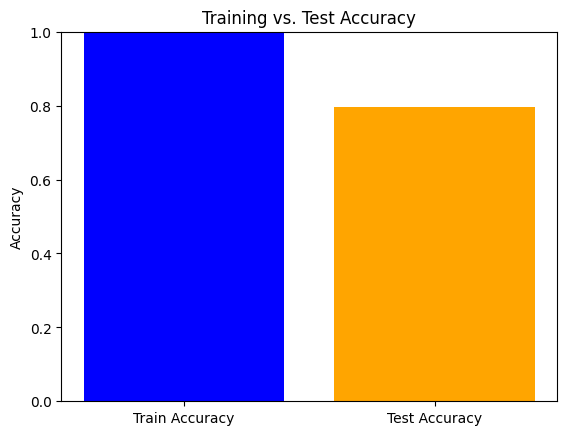

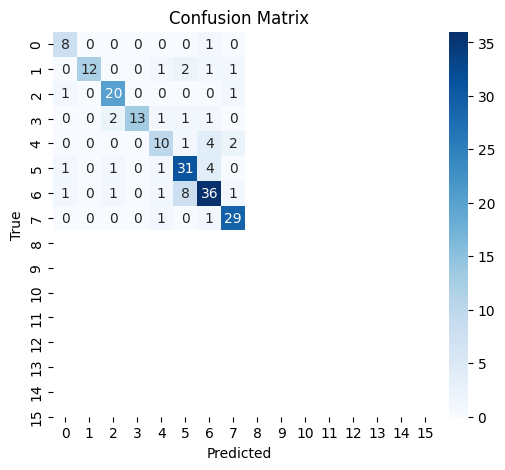

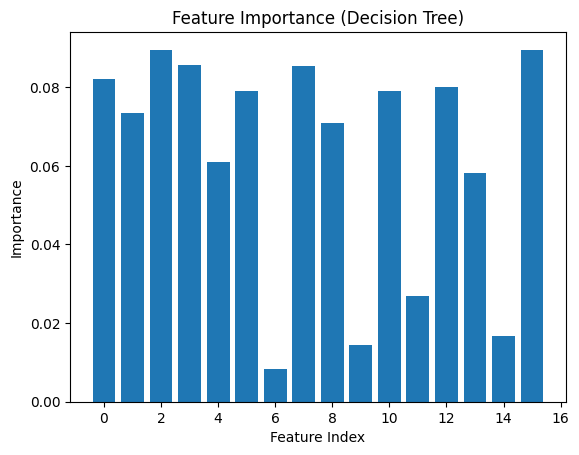

Welcome to the Simplified Chess-Like Game!
Current Board:
[[0 0 0 2]
 [1 2 0 0]
 [0 0 0 0]
 [0 0 0 0]]
Enter your move (e.g., '1,2') or 'q' to quit: 1,2
AI moves to (2, 0)
Current Board:
[[0 0 0 2]
 [1 2 2 0]
 [1 0 0 0]
 [0 0 0 0]]
Enter your move (e.g., '1,2') or 'q' to quit: 2,2
AI moves to (2, 0)
Current Board:
[[0 0 0 2]
 [1 2 2 0]
 [1 0 2 0]
 [0 0 0 0]]
Enter your move (e.g., '1,2') or 'q' to quit: 3,2
AI moves to (2, 0)
Current Board:
[[0 0 0 2]
 [1 2 2 0]
 [1 0 2 0]
 [0 0 2 0]]
Enter your move (e.g., '1,2') or 'q' to quit: 1,1
Invalid move. Try again.
Current Board:
[[0 0 0 2]
 [1 2 2 0]
 [1 0 2 0]
 [0 0 2 0]]
Enter your move (e.g., '1,2') or 'q' to quit: 2,3
AI moves to (2, 0)
Current Board:
[[0 0 0 2]
 [1 2 2 0]
 [1 0 2 2]
 [0 0 2 0]]
Enter your move (e.g., '1,2') or 'q' to quit: q
Thanks for playing!


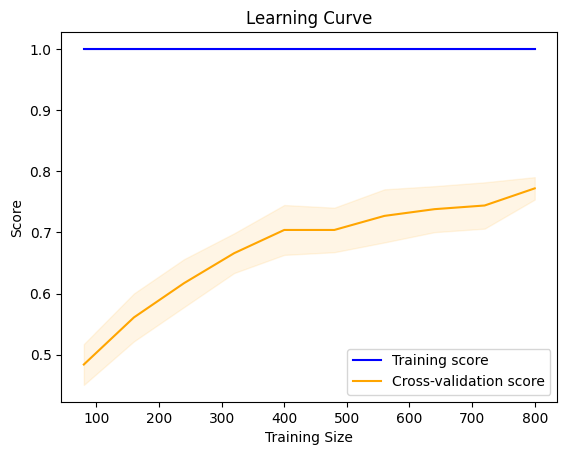

In [3]:
import numpy as np
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score , confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Define constants
BOARD_SIZE = 4
KING = 1
PAWN = 2
EMPTY = 0

# Helper functions for encoding and decoding moves
def encode_move(x, y):
    """Encode a move (x, y) into a single integer."""
    return x * BOARD_SIZE + y

def decode_move(encoded_move):
    """Decode a single integer into a move (x, y)."""
    return divmod(encoded_move, BOARD_SIZE)

# Helper function to generate random board states
def generate_random_board():
    board = np.zeros((BOARD_SIZE, BOARD_SIZE), dtype=int)
    # Place the king (1 per player)
    board[random.randint(0, BOARD_SIZE-1), random.randint(0, BOARD_SIZE-1)] = KING
    # Place a few pawns (2 per player)
    for _ in range(2):
        x, y = random.randint(0, BOARD_SIZE-1), random.randint(0, BOARD_SIZE-1)
        while board[x, y] != EMPTY:
            x, y = random.randint(0, BOARD_SIZE-1), random.randint(0, BOARD_SIZE-1)
        board[x, y] = PAWN
    return board

# Define improved optimal move generator
def get_optimal_move(board, player):
    """Improved logic for generating optimal moves."""
    king_pos = np.argwhere(board == KING)
    if len(king_pos) > 0:
        x, y = king_pos[0]
        moves = [(x+dx, y+dy) for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]]
        legal_moves = [(nx, ny) for nx, ny in moves if 0 <= nx < BOARD_SIZE and 0 <= ny < BOARD_SIZE]
        # Evaluate moves by assigning scores (centrality)
        scored_moves = {move: -(abs(move[0] - BOARD_SIZE//2) + abs(move[1] - BOARD_SIZE//2)) for move in legal_moves}
        return encode_move(*max(scored_moves, key=scored_moves.get))  # Choose best move
    return encode_move(x, y)

# Generate dataset
def generate_dataset(num_samples=1000):
    X, y = [], []
    for _ in range(num_samples):
        board = generate_random_board()
        move = get_optimal_move(board, player=1)
        X.append(board.flatten())
        y.append(move)
    return np.array(X), np.array(y)

# Train PAC model
def train_pac_model():
    X, y = generate_dataset()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a Decision Tree model
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)

    # Predict on training and test data
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Training Accuracy: {train_accuracy*100:.2f}%")
    print(f"Test Accuracy: {test_accuracy*100:.2f}%")

    # Plot accuracy comparison
    plot_accuracy_comparison(train_accuracy, test_accuracy)

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_test_pred)

    # Feature importance plot (if using a decision tree)
    plot_feature_importance(clf.feature_importances_)

    return clf

def plot_accuracy_comparison(train_accuracy, test_accuracy):
    """Plot training vs. test accuracy."""
    accuracies = [train_accuracy, test_accuracy]
    labels = ['Train Accuracy', 'Test Accuracy']

    plt.bar(labels, accuracies, color=['blue', 'orange'])
    plt.ylabel('Accuracy')
    plt.title('Training vs. Test Accuracy')
    plt.ylim(0, 1)
    plt.show()

def plot_confusion_matrix(y_true, y_pred):
    """Plot confusion matrix."""
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(16), yticklabels=np.arange(16))
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def plot_feature_importance(feature_importances):
    """Plot feature importance (for Decision Trees)."""
    plt.bar(range(len(feature_importances)), feature_importances)
    plt.xlabel('Feature Index')
    plt.ylabel('Importance')
    plt.title('Feature Importance (Decision Tree)')
    plt.show()

def plot_learning_curve(model, X_train, y_train):
    """Plot learning curve."""
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

    # Calculate the mean and standard deviation of the training and test scores
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the learning curve
    plt.plot(train_sizes, train_mean, label='Training score', color='blue')
    plt.plot(train_sizes, test_mean, label='Cross-validation score', color='orange')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='orange', alpha=0.1)

    plt.title('Learning Curve')
    plt.xlabel('Training Size')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.show()



# Interactive gameplay
def play_against_ai(model):
    """Allow the user to play against the trained AI."""
    board = generate_random_board()
    print("Welcome to the Simplified Chess-Like Game!")
    while True:
        print("Current Board:")
        print(board)

        # User input
        user_move = input("Enter your move (e.g., '1,2') or 'q' to quit: ")
        if user_move.lower() == 'q':
            print("Thanks for playing!")
            break

        try:
            user_x, user_y = map(int, user_move.split(","))
            if board[user_x, user_y] == EMPTY:
                board[user_x, user_y] = PAWN
            else:
                print("Invalid move. Try again.")
                continue
        except (ValueError, IndexError):
            print("Invalid input format. Try again.")
            continue

        # AI move
        encoded_ai_move = model.predict([board.flatten()])[0]
        ai_move = decode_move(encoded_ai_move)
        print(f"AI moves to {ai_move}")
        board[ai_move] = KING

        # Check for win/loss conditions (can be expanded)
        if np.sum(board == KING) == 0:
            print("You captured the AI's King! You win!")
            break

X, y = generate_dataset()

# Main execution
if __name__ == "__main__":
    pac_model = train_pac_model()
    play_against_ai(pac_model)
    plot_learning_curve(pac_model, X, y)
